using GPX library  from https://github.com/tkrajina/gpxpy
Using GMaps library from http://jupyter-gmaps.readthedocs.io/en/latest/gmaps.html


Distance covered 10.170537km 6.321030 miles


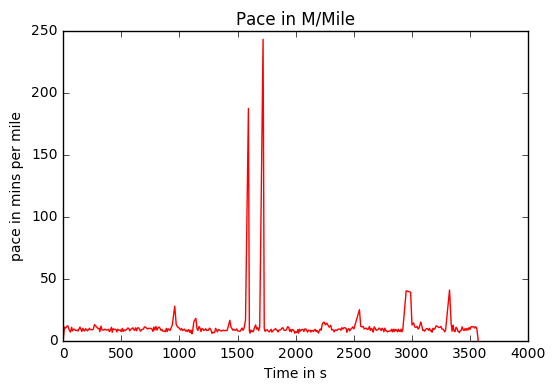

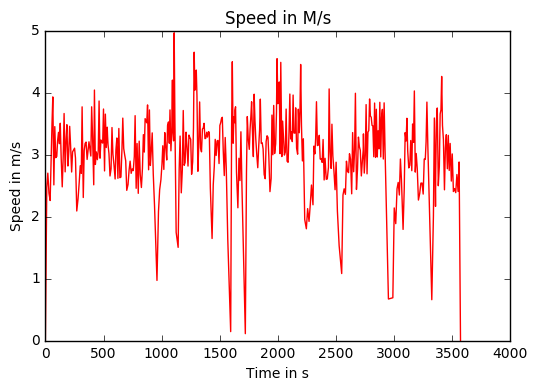

In [1]:
import gpxpy
import gpxpy.gpx

import gmaps
import gmaps.datasets

from haversine import haversine


import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from mysecrets import gmaps_apikey as api_key

gmaps.configure(api_key)
#gpx_file = open('gps_export_20161009_0755.gpx', 'r')
gpx_file = open('Club_Fartlek.gpx', 'r')
#gpx_file = open('Morning_Run.gpx', 'r')
#gpx_file = open('validation_gpx10.gpx', 'r')
gpx = gpxpy.parse(gpx_file)
gpx_file.close()
#print gpx

# arrays to hold complete track info
cum_dist=[]
speed=[]
delta_distance=[]
delta_time=[]
cum_time=[]
mpm=[]
for track in gpx.tracks:
    for segment in track.segments:
        times=[x.time  for x in segment.points]
    for segment in track.segments:
        # set the starting pos
        prev_pos=(segment.points[0].latitude,segment.points[0].latitude)
        coords=[(x.latitude , x.longitude)  for x in segment.points]
        n=0
        
        prev_pos=coords[0]
        prev_time=times[0]
        for x in segment.points:
            delta_distance.append(haversine(prev_pos,coords[n]))
            # possibly want to add eleveations....
            delta_time.append((times[n]-prev_time).total_seconds())
            
            cum_dist.append(sum(delta_distance))
            cum_time.append(sum(delta_time))
            #avoid /0 errors
            if(delta_time[n]==0):
                speed.append(0)
            else:
                speed.append((delta_distance[n]*1000.0)/delta_time[n])
            # avoid /0 errors
            if(speed[n]==0):
                mpm.append(0)
            else:
                mpm.append(1/(speed[n]*0.03728227153424))

            prev_pos=coords[n]
            prev_time=times[n]
            n=n+1
            
            

totaldistance=sum(delta_distance)
print "Distance covered %fkm %f miles" % (totaldistance,totaldistance /1.609)

#print delta_distance
#print speed
#print mpm
# fix maths here


figure()
plot(cum_time, mpm, 'r')
xlabel('Time in s')
ylabel('pace in mins per mile')
title('Pace in M/Mile')
show()



figure()

plot(cum_time, speed, 'r')
xlabel('Time in s')
ylabel('Speed in m/s')
title('Speed in M/s')
show()



m=gmaps.Map()
track_layer = gmaps.symbol_layer(coords, fill_color="green", stroke_color="green", scale=2)
m.add_layer(track_layer)
m



Distance
More info here.
http://www.movable-type.co.uk/scripts/latlong.html


This uses the ‘haversine’ formula to calculate the great-circle distance between two points – that is, the shortest distance over the earth’s surface – giving an ‘as-the-crow-flies’ distance between the points (ignoring any hills they fly over, of course!).
Haversine
formula:
a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)
c = 2 ⋅ atan2( √a, √(1−a) )
d = R ⋅ c 
where
φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km);
note that angles need to be in radians to pass to trig functions!

**Current script is underestimating. **
Todo:
Investigate adding eleveation (assuming haversine distance is along the flat, then the distance travelled will be

√(haversine²+elevationdelta²)